<a href="https://colab.research.google.com/github/Antonios0499/Challenge_idsk/blob/main/Challenge_automotive_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge automotive data

Este proyecto contiene la limpieza, tratamiento y exploración de un dataset con información de diversos automóviles de distintas marcas, además incluye la implementación de un modelo de machine learning para la predicción del precio de un automóvil en base a sus características.



Antonio Soto //
tonysoto0499@gmail.com

##Importación de librerías y carga de dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [2]:
sns.set_theme(style="darkgrid")
sns.set_palette('Set1')

In [3]:
data_link = 'https://github.com/Antonios0499/Challenge_idsk/raw/main/Automobile_data.csv'

In [4]:
data = pd.read_csv(data_link)

In [5]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


El dataset en cuestión contiene información de automóviles, cuenta con 26 columnas y 205 observaciones.

##Tipo de informacion

In [7]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
data.dtypes.value_counts()

object     16
int64       5
float64     5
dtype: int64

El dataset contiene tres tipos de datos, siendo estos:
* float64
* int64
* object



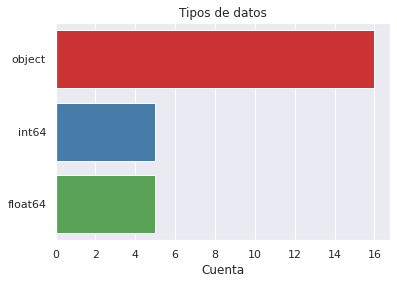

In [9]:
sns.countplot(y = data.dtypes, order = data.dtypes.value_counts().index, )
plt.title('Tipos de datos')
plt.xlabel('Cuenta')
plt.show()

Después de inspeccionar el dataset y comparar el tipo de dato de los datos existentes en las columnas, con los tipos de datos en los que están guardados, podemos observar que existen columnas que deberían cambiarse a numéricas, estas son:
* normalized-losses.
* bore.
* stroke.
* horsepower.
* peak-rpm.
* price.

In [10]:
#variables categóricas:
categoricas = ['make','fuel-type','aspiration', 'num-of-doors',
               'body-style', 'drive-wheels', 'engine-location',
               'engine-type', 'num-of-cylinders','fuel-system']

#variables a convertir a numéricas:
numericas = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']

Al tratar de convertir los datos directamente a numéricos usando Pandas, surge un error pues parece que existen datos faltantes. 

Después de analizar los datos faltantes podremos realizar el cambio de tipo de datos.

##Datos faltantes

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

La información inicial nos muestra que el dataset no contiene ningún tipo de dato faltante, pero con un vistazo al mismo muestra que contiene elementos faltantes representados por un símbolo '?'.

A continuación, se explorará más a fondo el dataset para buscar otros valores que pudieran también considerarse como faltantes.


In [12]:
for col in data.columns:
  print(data[col].unique())

[ 3  1  2  0 -1 -2]
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 

El análisis de los valores únicos de cada columna del dataset permite confirmar que los únicos tipos de valores faltantes en el dataset son los símbolos '?', el siguiente paso es encontrar que columnas contienen datos faltantes y en qué cantidad.

In [13]:
faltantes = []
for col in data.columns:
  if len(data[data[col]=='?']) > 0:
    null =len(data[data[col]=='?'])
    faltantes.append(col)
    print('---')
    print("La variable {} contiene {} '?'".format(col,null))

---
La variable normalized-losses contiene 41 '?'
---
La variable num-of-doors contiene 2 '?'
---
La variable bore contiene 4 '?'
---
La variable stroke contiene 4 '?'
---
La variable horsepower contiene 2 '?'
---
La variable peak-rpm contiene 2 '?'
---
La variable price contiene 4 '?'


**Para tratar con la información faltante haría lo siguiente:**
1. Convertir las variables a los tipos de datos apropiados.
1. Eliminar las filas con información faltante de la variable a predecir por nuestro modelo, en este caso las 4 filas con datos faltantes de la variable price.
1. Evaluar las demás variables con datos faltantes y separarlas por variables categóricas y numéricas.

Para el caso de variables categóricas:
* rellenar los datos con el valor más frecuente.

Para el caso de variables numéricas:

1. Buscar outliers para cada variable.
1. En caso de existir outliers, rellenar los datos faltantes con la mediana de cada variable.
1. En caso de no existir outliers, rellenar los datos con el promedio.
* La selección de este método se debe a que el promedio es una métrica que se ve afectada en gran cantidad por la existencia de outliers, mientras que la mediana no.



**Aclaración importante**


Como nuestro dataset lo utilizaremos para hacer predicciones sobre el precio del automóvil, antes de hacer cualquier tratamiento para los datos faltantes, separaremos el dataset en los sets respectivos de entrenamiento y prueba.
* Esta precaución no es necesaria tomarla para el caso del cambio de tipo de datos y la eliminación de registros con información faltante de la variable objetivo.


**Aplicamos los dos primeros pasos**

In [14]:
data.replace("?", np.nan, inplace = True)

In [15]:
for col in numericas:
  data[col] = pd.to_numeric(data[col])

In [16]:
data.dropna(subset = ['price'], inplace = True)
data.reset_index(drop = True, inplace = True)

##Detección de outliers

Los outliers de los datos se pueden encontrar fácilmente utilizando un boxplot. primero obtenemos las variables numéricas.

In [17]:
def get_numeric(data):
  variables = []
  for col in data.columns:
    if data[col].dtype != 'object':
      variables.append(col)
  return variables

Graficamos un boxplot para cada una de ellas, dependiendo de lo mostrado por el gráfico, procederemos a buscar los datos específicos.

boxplot para la variable: symboling.


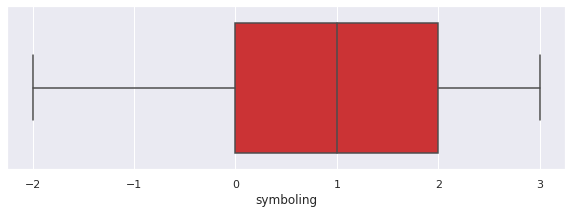

boxplot para la variable: normalized-losses.


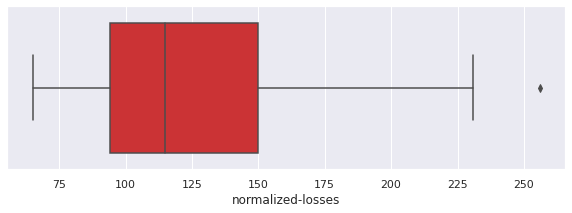

boxplot para la variable: wheel-base.


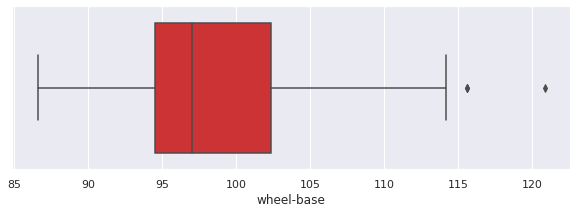

boxplot para la variable: length.


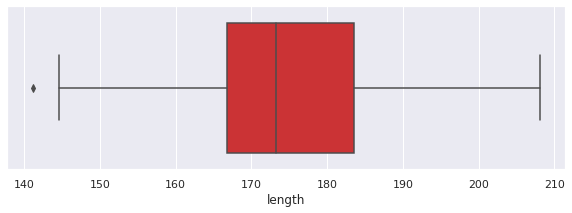

boxplot para la variable: width.


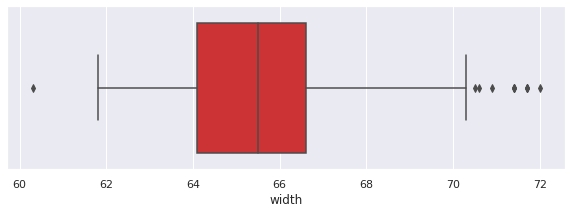

boxplot para la variable: height.


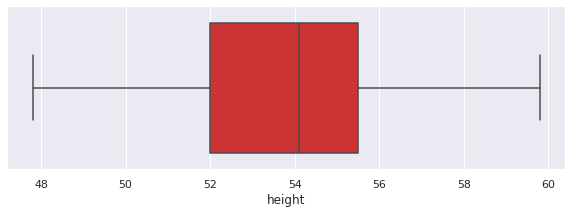

boxplot para la variable: curb-weight.


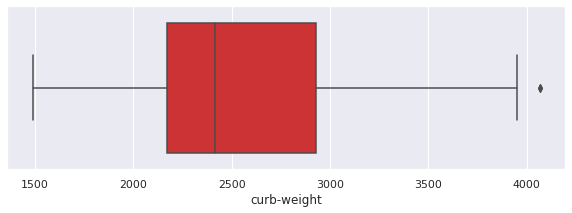

boxplot para la variable: engine-size.


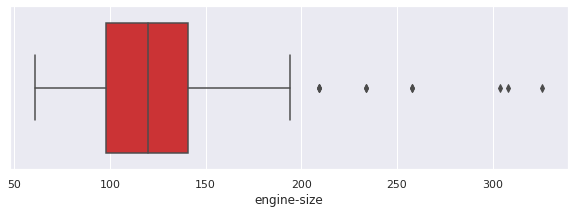

boxplot para la variable: bore.


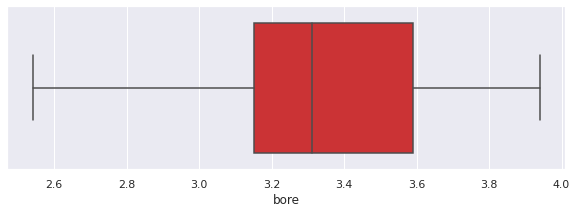

boxplot para la variable: stroke.


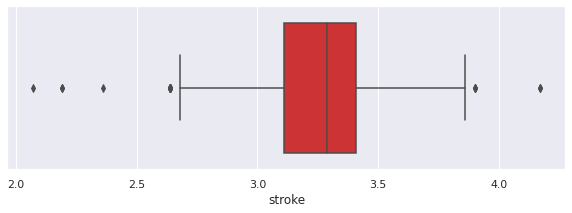

boxplot para la variable: compression-ratio.


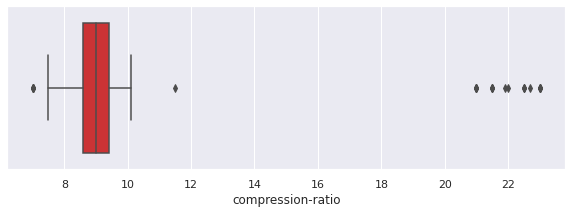

boxplot para la variable: horsepower.


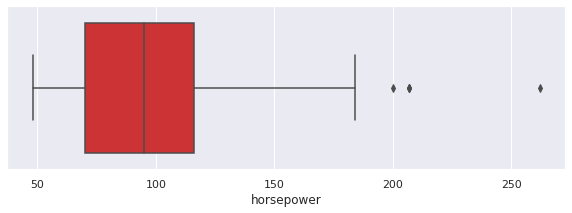

boxplot para la variable: peak-rpm.


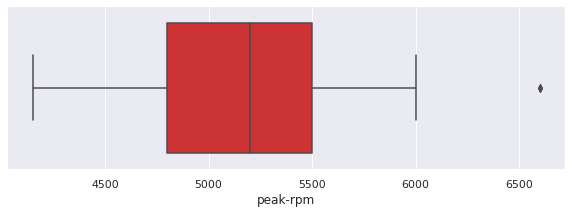

boxplot para la variable: city-mpg.


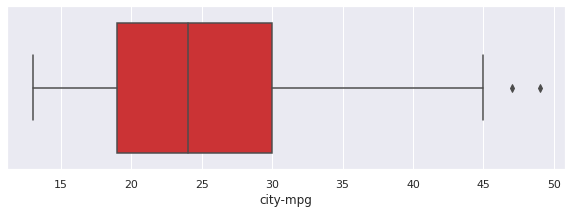

boxplot para la variable: highway-mpg.


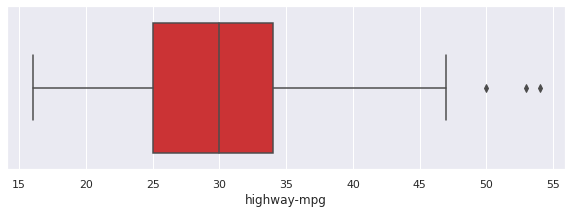

boxplot para la variable: price.


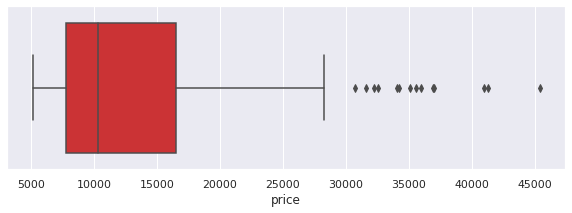

In [18]:
for col in get_numeric(data):
  print('boxplot para la variable: '+col+".")
  fig, ax = plt.subplots(figsize = (10,3))
  sns.boxplot(x = data[col])
  plt.show()

Basándonos en lo observado con los boxplot, las variables que contienen outliers son:
* normalized-losses
* wheel-base
* length
* width
* curb-weight
* engine-size
* stroke
* compression-ratio
* horsepower
* peak-rpm
* city-mpg
* highway-mpg
* price

Para encontrar específicamente cuáles son estos valores, podemos calcular los límites inferior y superior con los cuartiles.


In [19]:
def get_limits(data):
  Q1 = data.describe().loc['25%',:]
  Q2 = data.describe().loc['75%',:]
  rango_ic = Q2 - Q1
  l_inferior = Q1 - 1.5 * rango_ic
  l_superior = Q2 + 1.5 * rango_ic
  return pd.DataFrame({'l_inferior': l_inferior,'l_superior': l_superior}).T

def get_outliers(data):
  limites = get_limits(data)
  indices = []
  cantidad = []
  for col in get_numeric(data):
    below = data[data[col] < limites.loc['l_inferior',col]]
    above = data[data[col] > limites.loc['l_superior',col]]
    outliers =  pd.concat([below,above])
    indices.append(outliers.index.values)
    cantidad.append(len(outliers))
  return pd.DataFrame({"Número de Outliers": cantidad,"Outliers":indices},index = get_numeric(data))

def outliers_list(dataset):
  data = get_outliers(dataset)
  con_outliers = []
  sin_outliers = []
  for col in get_numeric(dataset):
    if len(data['Outliers'][col]) > 0:
      con_outliers.append(col)
    else:
      sin_outliers.append(col)
  return con_outliers, sin_outliers

In [20]:
outliers = get_outliers(data)

In [21]:
outliers

,Número de Outliers,Outliers
symboling,0,[]
normalized-losses,1,[186]
wheel-base,3,"[67, 68, 70]"
length,1,[17]
width,11,"[17, 6, 7, 8, 16, 46, 67, 68, 69, 70, 71]"
height,0,[]
curb-weight,2,"[44, 45]"
engine-size,10,"[14, 15, 16, 44, 45, 46, 68, 69, 70, 71]"
bore,0,[]
stroke,20,"[108, 110, 130, 134, 135, 136, 137, 138, 139, ..."


De esta forma podemos confirmar lo que observamos en los gráficos, pero además podemos obtener la cantidad exacta de outliers y sus índices en caso de querer seguir revisándolos.

Por ejemplo, la variable que más llama la atención es compression-ratio pues tiene una gran cantidad de outliers, revisemos cuáles son.


In [22]:
data.iloc[outliers['Outliers']['compression-ratio'],:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.0,5000.0,19,24,12964.0
79,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145.0,5000.0,19,24,12629.0
80,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14869.0
81,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14489.0
114,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150.0
121,3,NaN,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,12764.0
46,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
63,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0


##Interacción

**Variables numéricas**

Para evaluar la interacción entre las variables numéricas predictoras y la variable objetivo, podemos utilizar una matriz de correlación.


In [23]:
numer = get_numeric(data)

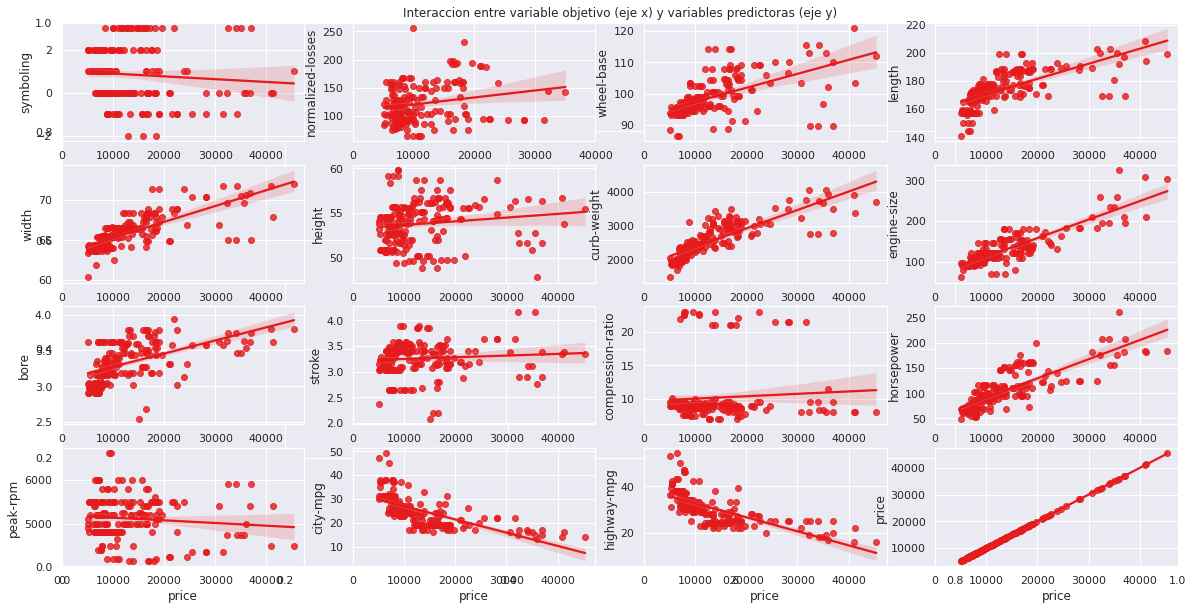

In [24]:
fig = plt.figure(figsize=(20, 10))
plt.title('Interaccion entre variable objetivo (eje x) y variables predictoras (eje y)')
gs = gridspec.GridSpec(nrows=4, ncols=4)
xticks = np.arange(0, 50000, 10000)

ax1 =  fig.add_subplot(gs[0, 0])
ax1 = sns.regplot(x= data['price'], y = data[numer[0]]).set_xticks(xticks)

ax2 =  fig.add_subplot(gs[0, 1])
ax2 = sns.regplot(x= data['price'], y = data[numer[1]]).set_xticks(xticks)

ax3 =  fig.add_subplot(gs[0, 2])
ax3 = sns.regplot(x = data['price'], y = data[numer[2]]).set_xticks(xticks)

ax4 =  fig.add_subplot(gs[0, 3])
ax4 = sns.regplot(x = data['price'], y = data[numer[3]]).set_xticks(xticks)

ax5 =  fig.add_subplot(gs[1, 0])
ax5 = sns.regplot(x = data['price'], y = data[numer[4]]).set_xticks(xticks)

ax6 =  fig.add_subplot(gs[1, 1])
ax6 = sns.regplot(x = data['price'], y = data[numer[5]]).set_xticks(xticks)

ax7 =  fig.add_subplot(gs[1, 2])
ax7 = sns.regplot(x = data['price'],y = data[numer[6]]).set_xticks(xticks)

ax8 =  fig.add_subplot(gs[1, 3])
ax8 = sns.regplot(x = data['price'], y = data[numer[7]]).set_xticks(xticks)

ax9 =  fig.add_subplot(gs[2, 0])
ax9 = sns.regplot(x = data['price'], y = data[numer[8]]).set_xticks(xticks)

ax10 =  fig.add_subplot(gs[2, 1])
ax10 = sns.regplot(x = data['price'], y = data[numer[9]]).set_xticks(xticks)

ax11 =  fig.add_subplot(gs[2, 2])
ax11 = sns.regplot(x = data['price'], y = data[numer[10]]).set_xticks(xticks)

ax12 =  fig.add_subplot(gs[2, 3])
ax12 = sns.regplot(x = data['price'], y = data[numer[11]]).set_xticks(xticks)

ax13 =  fig.add_subplot(gs[3, 0])
ax13 = sns.regplot(x = data['price'], y = data[numer[12]]).set_xticks(xticks)

ax14 =  fig.add_subplot(gs[3, 1])
ax14 = sns.regplot(x = data['price'], y = data[numer[13]]).set_xticks(xticks)

ax15 =  fig.add_subplot(gs[3, 2])
ax15 = sns.regplot(x = data['price'], y = data[numer[14]]).set_xticks(xticks)

ax16 =  fig.add_subplot(gs[3, 3])
ax16 = sns.regplot(x = data['price'], y = data[numer[15]]).set_xticks(xticks)


plt.show()

In [25]:
mask =np.ones_like(data.corr(), dtype=bool)
mask[:,-1] = False

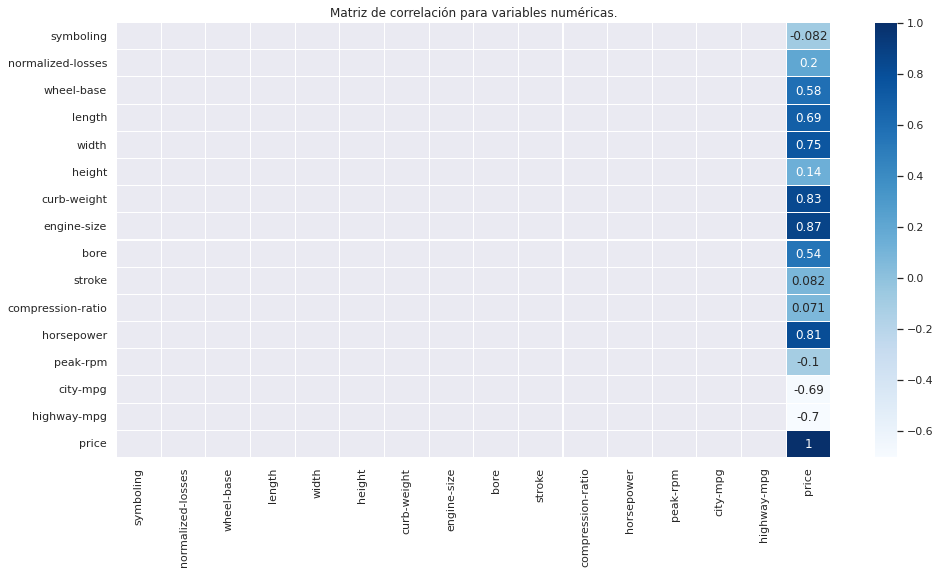

In [26]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), mask=mask, annot=True, linewidths=0.1, cmap = 'Blues')
plt.title('Matriz de correlación para variables numéricas.')
plt.show()

Este mapa nos muestra que existen algunas variables con una alta correlación con la variable objetivo, estas son:
* length
* width 
* curb-weight 
* engine-size 
* horsepower 
* city-mpg 
* highway-mpg

Las primeras tres variables están relacionadas al tamaño del vehículo e indican que, a mayor tamaño, más material se utiliza para la construcción del coche y por tanto el precio aumenta.

Las siguientes dos están relacionadas con el motor del coche e indican que, a mayor tamaño de motor y mayor potencia, el precio aumenta.

Las últimas dos indican que, a menor eficiencia de combustible, el precio aumenta, esto se puede entender pues a mayor potencia de motor, menor rendimiento tiene el combustible.


**Variables categóricas**

Para obtener una idea de la interacción de las variables categóricas con la variable objetivo, utilizaremos de igual forma una matriz de correlación, pero codificando antes estas variables categóricas.


In [27]:
data_cat =  data.loc[:,categoricas]
data_cat['price'] = data['price']
data_cat = pd.get_dummies(data_cat,drop_first=False).corr()

El utilizar este método para revisar la interacción entre variables categóricas con una variable numérica permite darnos una idea de cuánto impacto tiene la existencia de la variable categórica en el valor de la variable numérica.

In [28]:
mask =np.ones_like(data_cat.corr(), dtype=bool)
mask[:,0] = False

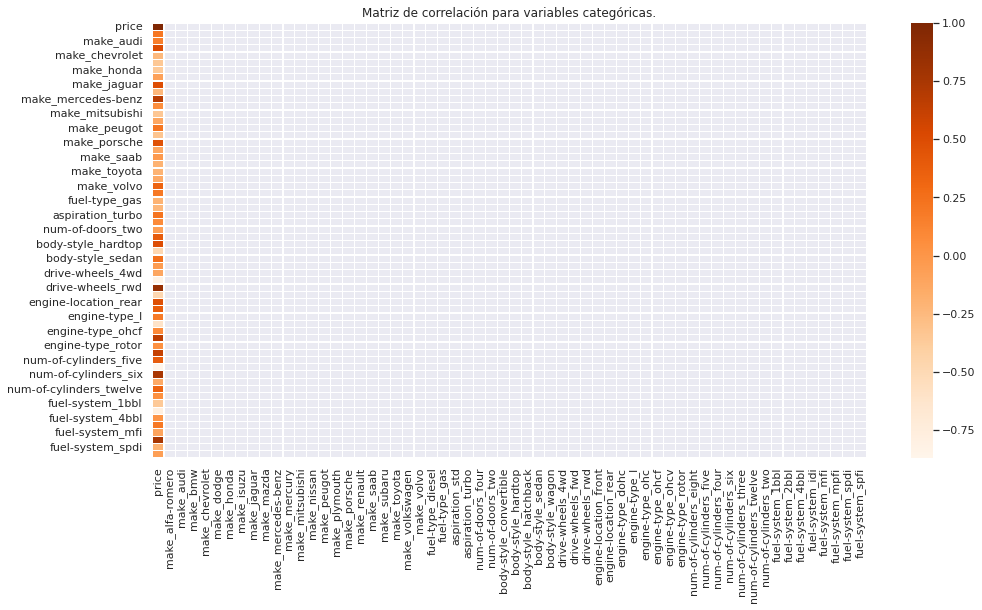

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(data_cat.corr(), mask=mask, linewidths=0.1, cmap = 'Oranges')
plt.title('Matriz de correlación para variables categóricas.')
plt.show()

Al ser muchas variables, se vuelve complicado observar las interacción pero de igual forma podemos obtener las que tienen mayor impacto.

In [30]:
data_cat[abs(data_cat['price']) > .5]['price']

price                    1.000000
make_mercedes-benz       0.524953
drive-wheels_fwd        -0.595979
drive-wheels_rwd         0.637522
num-of-cylinders_four   -0.691968
fuel-system_mpfi         0.509698
Name: price, dtype: float64

##Variable objetivo

La variable objetivo es el precio de los vehículos, la distribución de los datos de esta variable muestran que cerca del 50% de los registros se encuentran en un rango de 5000 a 10000 dólares.

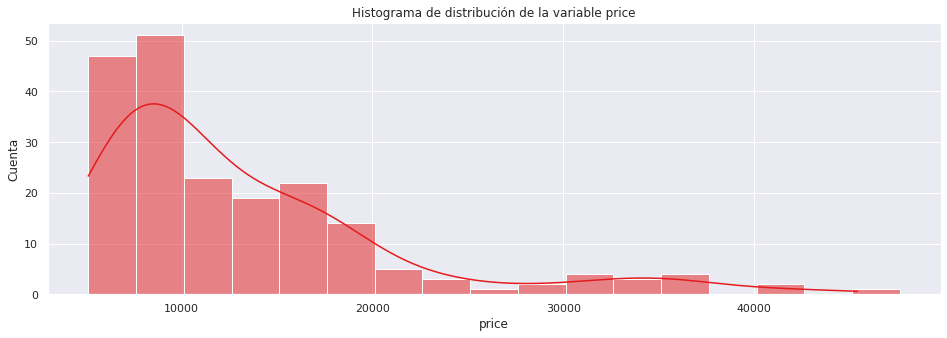

In [31]:
plt.figure(figsize = (16,5))
sns.histplot(data, x='price',kde = True, binwidth = 2500)
plt.title('Histograma de distribución de la variable price')
plt.ylabel('Cuenta')
plt.show()

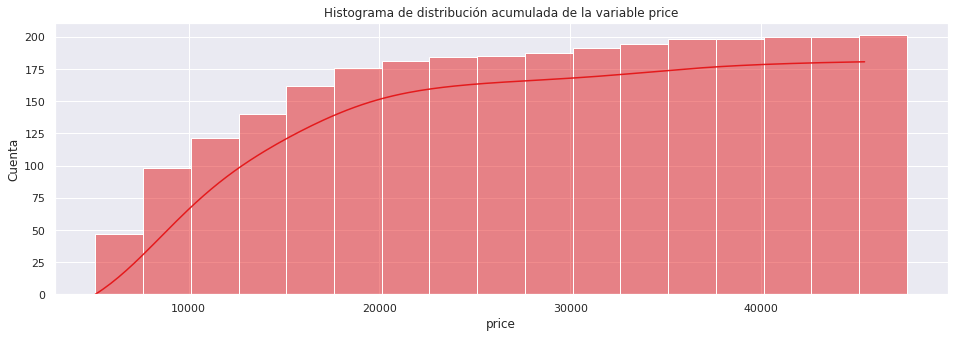

In [32]:
plt.figure(figsize = (16,5))
sns.histplot(data, x='price',kde = True,cumulative = True, binwidth = 2500)
plt.title('Histograma de distribución acumulada de la variable price')
plt.ylabel('Cuenta')
plt.show()

Si revisamos los outliers de la variable objetivo, vemos que todos los autos de precios demasiado elevados son de marcas de lujo, como se esperaría.

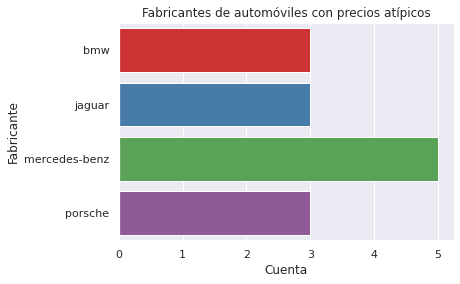

In [33]:
sns.countplot(y = data.iloc[outliers['Outliers']['price'],:]['make'])
plt.title('Fabricantes de automóviles con precios atípicos')
plt.ylabel('Fabricante')
plt.xlabel('Cuenta')
plt.show()

##Distribucion de variables con datos faltantes

In [34]:
data_hist = data.copy()
data_hist = data_hist.loc[:,faltantes]

In [35]:
data_hist['num-of-doors'] = data_hist['num-of-doors'].map(lambda x: 2 if x == 'two' else 4)
data_hist['num-of-doors'] = data_hist['num-of-doors'].map(lambda x: float(x))

In [36]:
data_full = data_hist.copy()

In [37]:
con_o, sin_o = outliers_list(data_hist)

In [38]:
for col in con_o:
  data_full[col] = data_full[col].fillna(data_full[col].median())
for col in sin_o:
  data_full[col] = data_full[col].fillna(data_full[col].mean())

In [39]:
data_hist.columns

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [40]:
def dist_plots(data):
  fig = plt.figure(figsize=(20, 10),constrained_layout=True)
  gs = gridspec.GridSpec(nrows=3, ncols=3, figure = fig)

  ax1 =  fig.add_subplot(gs[0, 0])
  ax1 = sns.kdeplot(data = data, x= data['normalized-losses'])

  ax2 =  fig.add_subplot(gs[0, 1])
  ax2 = sns.kdeplot(data = data, x= data['num-of-doors'])

  ax3 =  fig.add_subplot(gs[0, 2])
  ax3 = sns.kdeplot(data = data, x= data['bore'])

  ax4 =  fig.add_subplot(gs[1, 0])
  ax4 = sns.kdeplot(data = data, x= data['stroke'])

  ax5 =  fig.add_subplot(gs[1, 1])
  ax5 = sns.kdeplot(data = data, x= data['horsepower'])

  ax6 =  fig.add_subplot(gs[1, 2])
  ax6 = sns.kdeplot(data = data, x= data['peak-rpm'])

  ax7 =  fig.add_subplot(gs[2, 1])
  ax7 = sns.kdeplot(data = data, x= data['price'])


  plt.show()

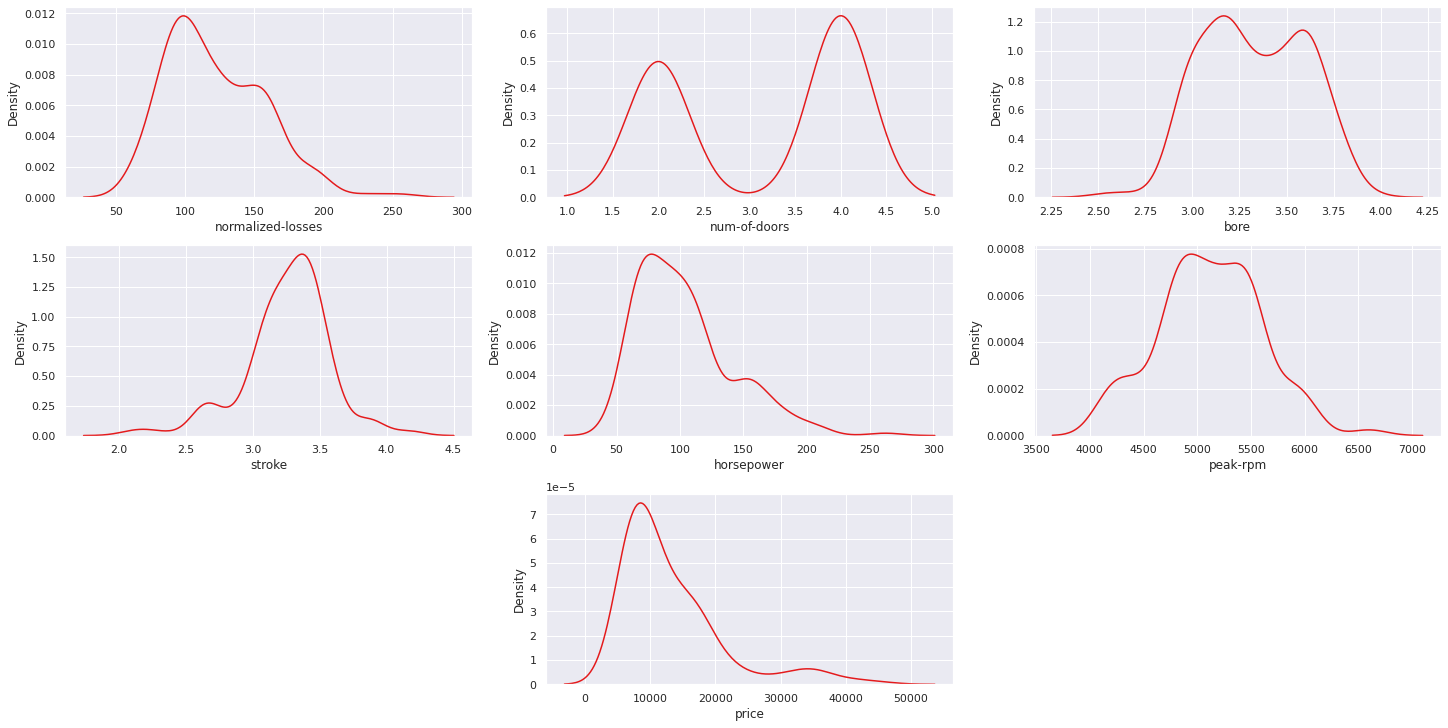

In [41]:
dist_plots(data_hist)

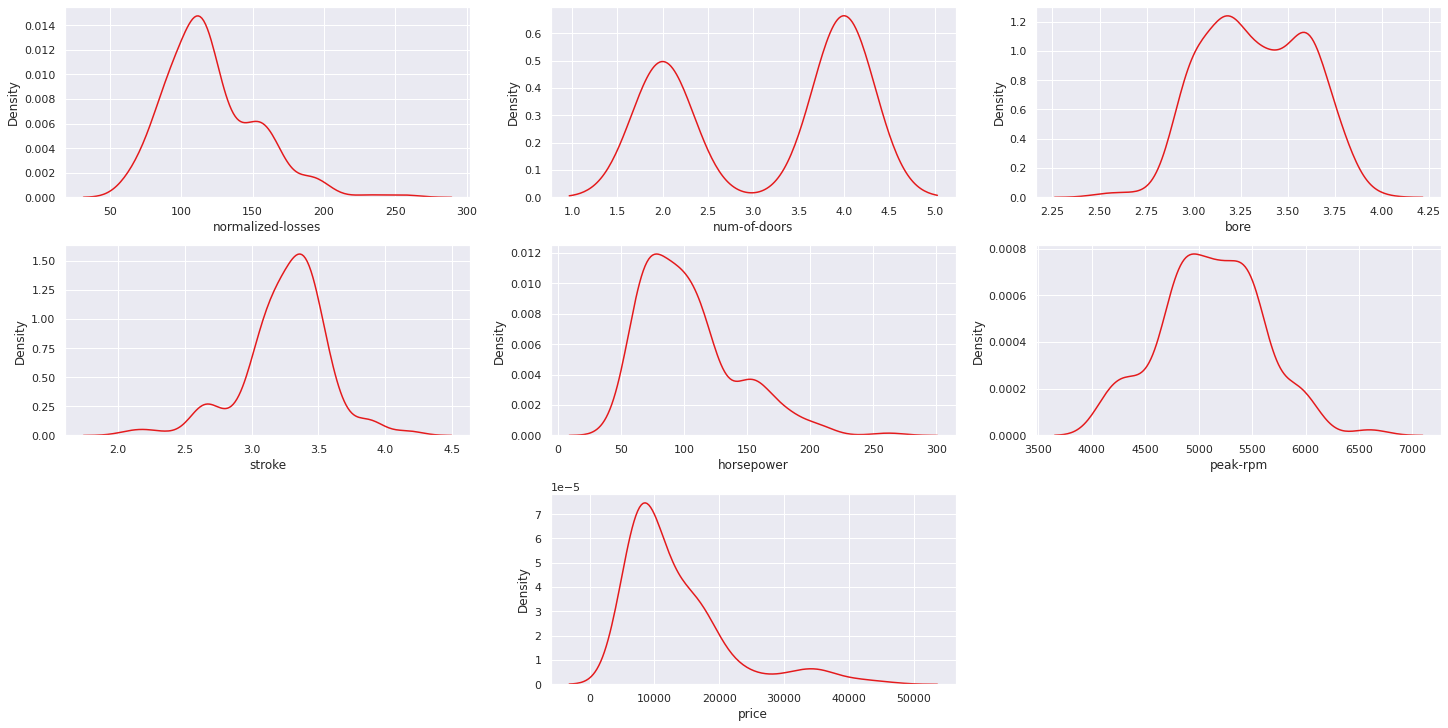

In [42]:
dist_plots(data_full)

##Pipeline

Se utiliza un modelo de gradient boosting para realizar las predicciones del precio de los automóviles, para desarrollar e implementar el modelo se usaron los siguientes pasos:
1.	Dividir el dataset en las variables objetivo y variables predictoras.
2.	Separar el dataset en sets de entrenamiento y prueba.
4.	Definir una función para transformar las columnas, esto contiene la codificación de variables categoricas.
5.	Establecimiento de un pipeline para transformar las columnas y aplicar el modelo.


In [43]:
y = data['price']
X = data.iloc[:,:-1]
xgbr = xgb.XGBRegressor(random_state=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state = 1)

In [45]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categoricas),
    remainder='passthrough'
)

In [46]:
pipe = make_pipeline(column_trans, xgbr)

Se utiliza .fit solo con los datos de entrenamiento, esto asegura que la transformación de datos sea únicamente con valores de entrenamiento conocidos y se evite data leakage.


In [47]:
pipe.fit(X_train,y_train)

[17:57:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('xgbregressor', XGBRegressor(random_state=1))])

In [48]:
y_predict = pipe.predict(X_test)

In [49]:
prediccion = pd.DataFrame({'Prediccion':y_predict,'real':y_test})

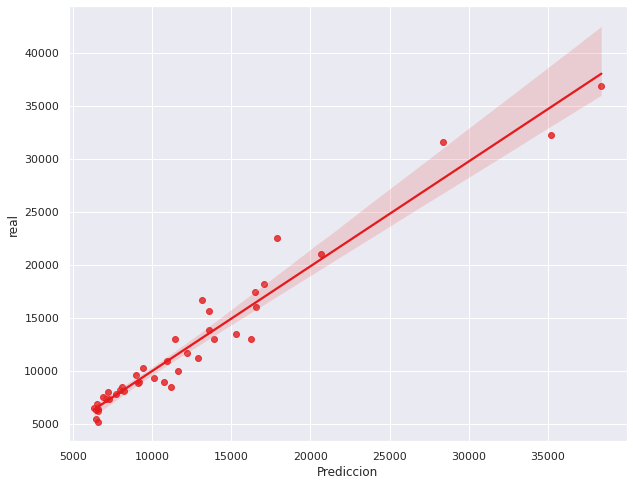

In [50]:
plt.figure(figsize=(10,8))
sns.regplot(data = prediccion, x = 'Prediccion', y = 'real')

In [51]:
print("RMSE: %.2f" % (np.sqrt(metrics.mean_squared_error(y_predict, y_test))))
print("MAE: %.2f" % metrics.mean_absolute_error(y_predict, y_test))
print("Coeficiente de determinación: %.2f" % metrics.r2_score(y_predict, y_test))

RMSE: 1574.99
MAE: 1118.77
Coeficiente de determinación: 0.95


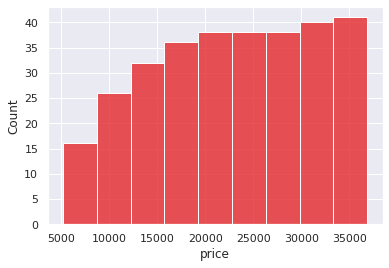

In [52]:
sns.histplot(y_test, cumulative = True)

Los resultados muestran que el error promedio entre las predicciones y los datos reales son de 1118.77 dolares por coche, que si bien puede parecer que no es mucho, cuando tomamos en cuenta que casi 1/3 de los datos se encuentran en el rango de 5000 - 7500 dolares, este error es considerable.